In [75]:
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import Image
pd.set_option('display.max_columns', 100)
%matplotlib inline

In [ ]:
%ls | grep xlsx


In [29]:
sel_columns = ['File', 'Number', 'Seasonal_strength(168)', 'max_kl_shift', 'max_var_shift']

df = pd.read_excel('Features_integrated_20190505.xlsx', usecols=sel_columns)
df = df.loc[df['File'].isin(['v1', 'v2', 'v4', 'v8', 'v11', 'v14', 
                             'v15', 'v19'])].reset_index(drop=True)
print (df.shape)

(199, 5)


In [30]:
df.head(4)

,File,Number,Seasonal_strength(168),max_var_shift,max_kl_shift
0,v1,1,0.152671,0.376575,14.452703
1,v1,2,0.021470,1.521405,71.041437
2,v1,3,0.007537,0.439625,18.553486
3,v1,4,0.157970,2.151772,111.147620


#### For the begining, let's start just with V1, V2 and V4

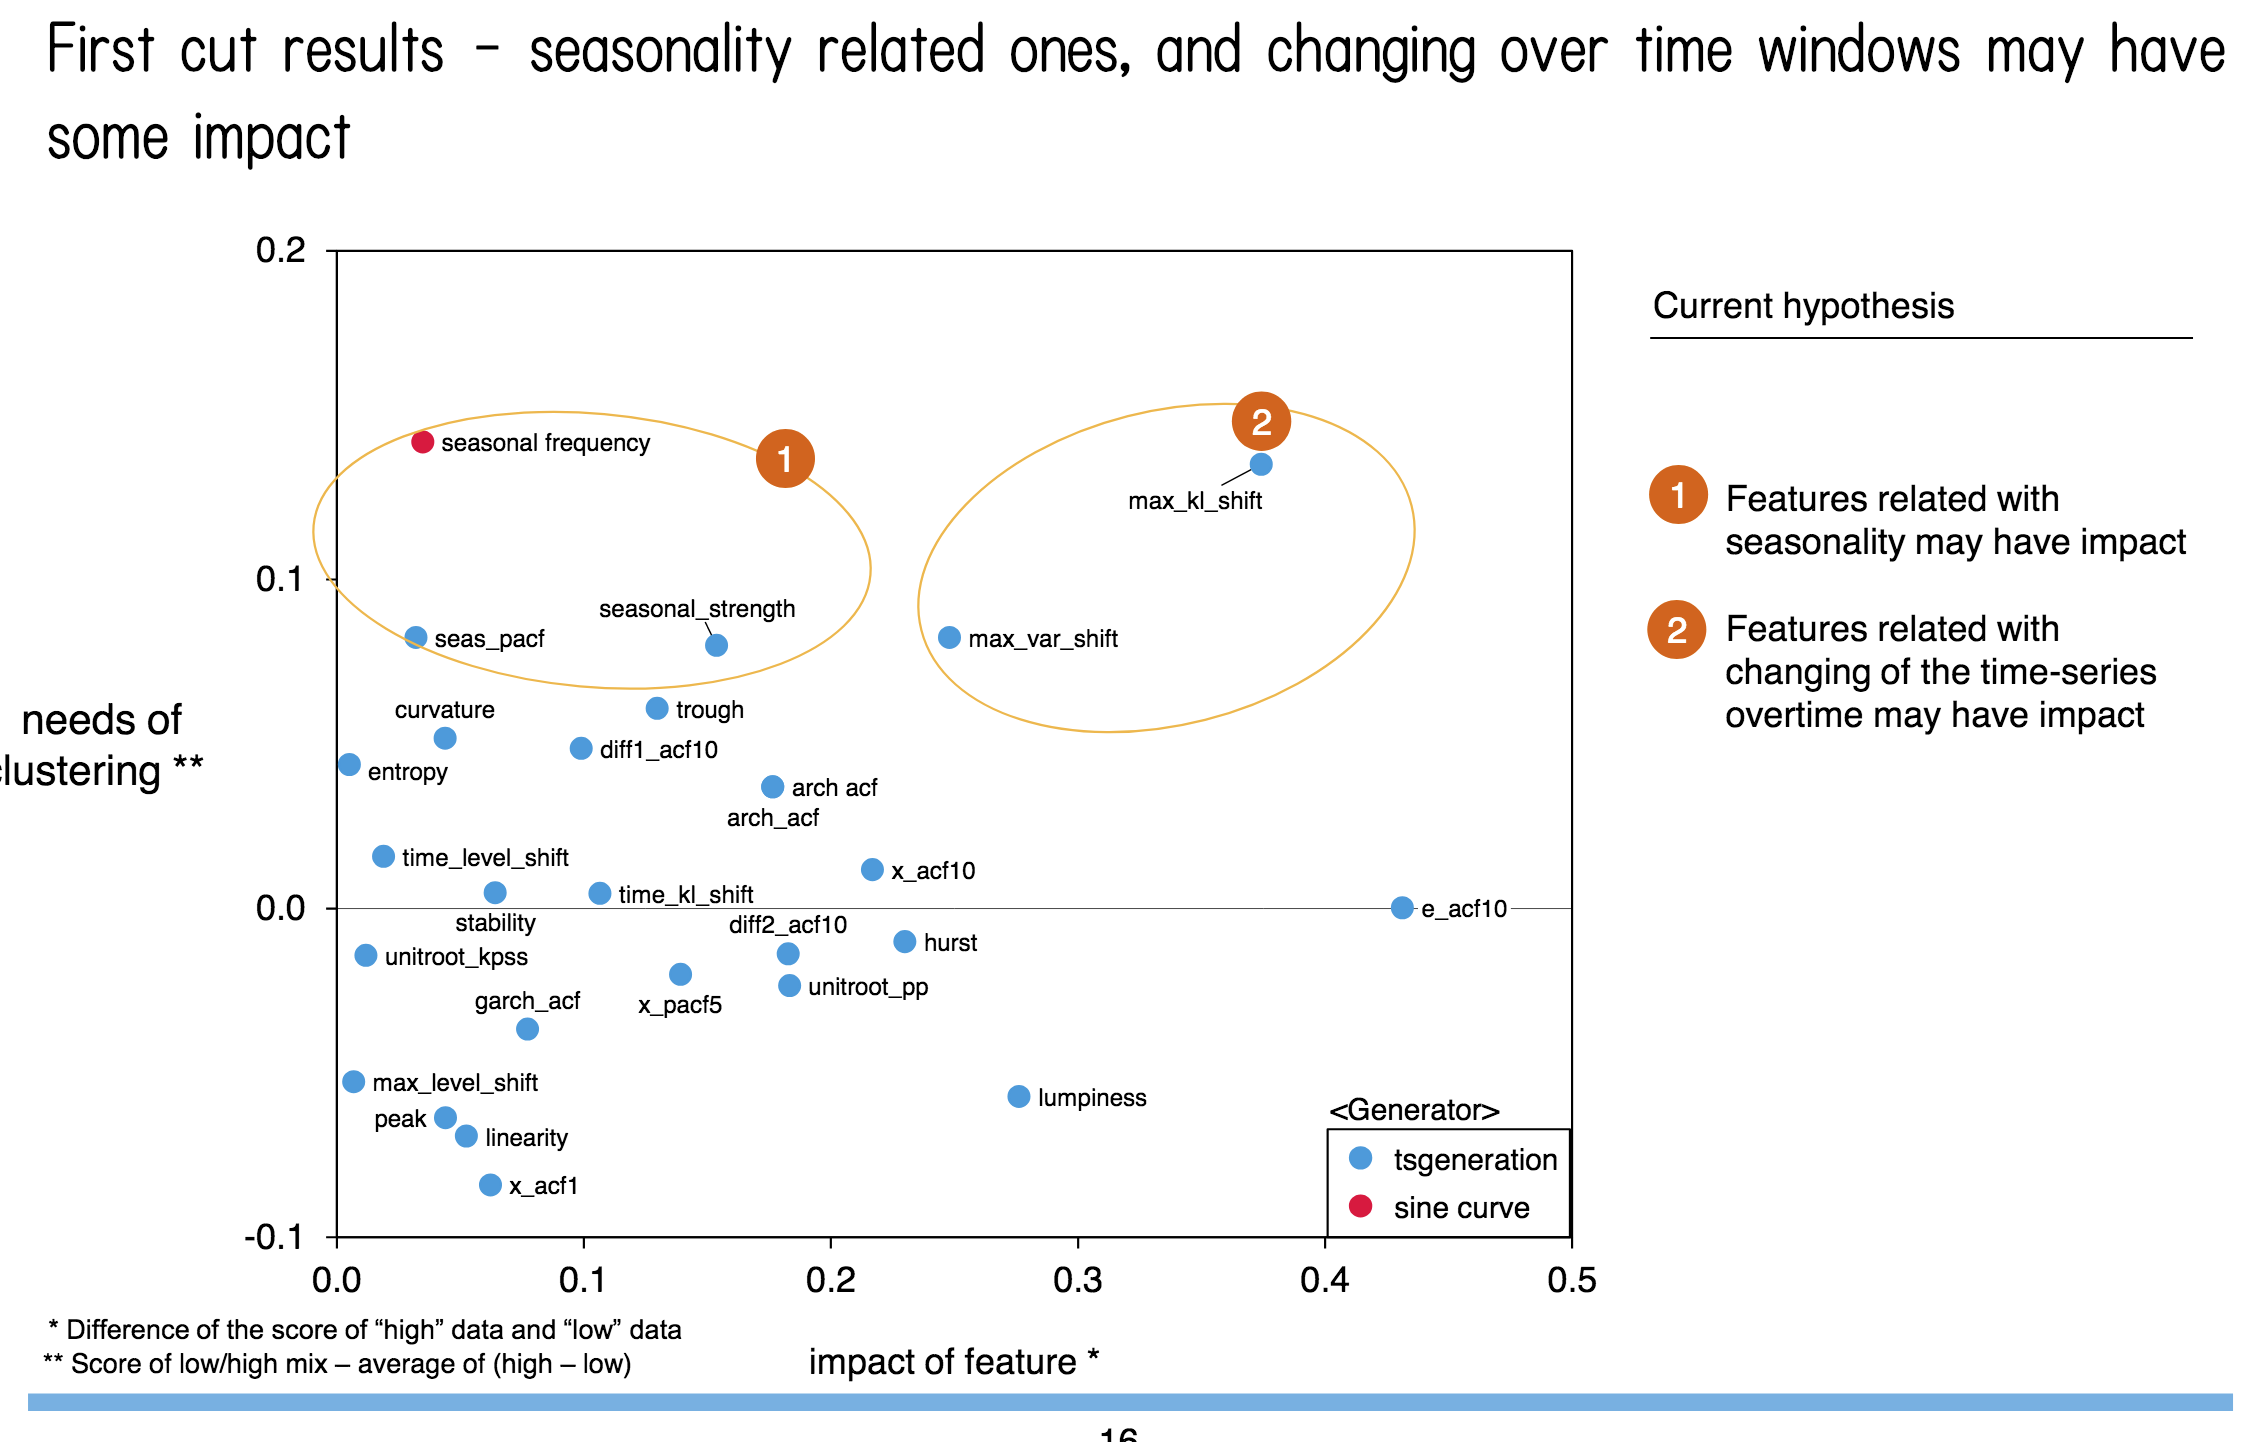

In [31]:
Image("tomie_cluster.png", width=600, height=600)

In [38]:
df_zscore = df
df_zscore[num_features] = (df[num_features] - df[num_features].mean())/df[num_features].std()

In [33]:
df_zscore.shape

(199, 3)

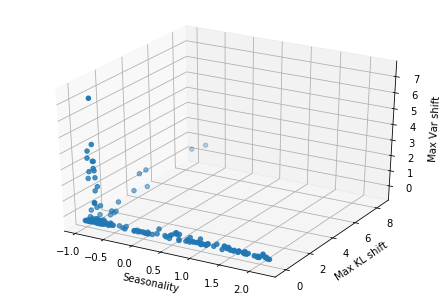

In [76]:
fig = plt.figure()
ax = Axes3D(fig)

v = df_zscore[num_features].values
ax.scatter(v[:,0], v[:,1], v[:,2])

ax.set_xlabel('Seasonality')
ax.set_ylabel('Max KL shift')
ax.set_zlabel('Max Var shift')
plt.show()


In [101]:
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1], dtype=int32)

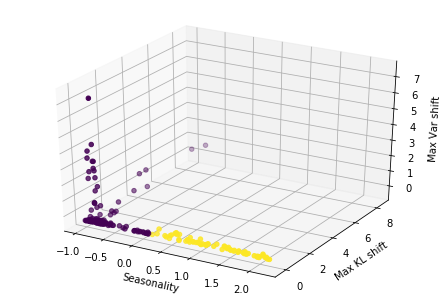

In [103]:
from sklearn.cluster import KMeans

v = df_zscore[num_features].values
y_pred_kmeans = KMeans(n_clusters=2,  max_iter=1e4).fit_predict(v)


fig = plt.figure()
ax = Axes3D(fig);

v = df_zscore[num_features].values
ax.scatter(v[:,0], v[:,1], v[:,2],  c= y_pred_kmeans);

ax.set_xlabel('Seasonality')
ax.set_ylabel('Max KL shift')
ax.set_zlabel('Max Var shift');

In [104]:
df['cluster'] = y_pred_kmeans

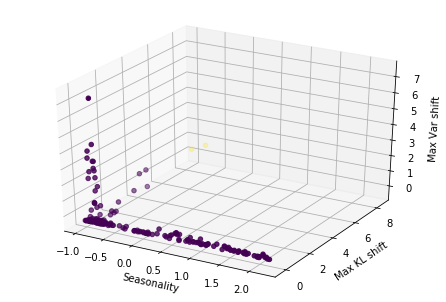

In [99]:
from sklearn.cluster import SpectralClustering

v = df_zscore[num_features].values
y_pred = SpectralClustering(n_clusters=2,
                            assign_labels="kmeans",
                            n_neighbors=5,
                            n_init=50).fit_predict(v)

fig = plt.figure()
ax = Axes3D(fig);

v = df_zscore[num_features].values
ax.scatter(v[:,0], v[:,1], v[:,2],  c=y_pred);

ax.set_xlabel('Seasonality')
ax.set_ylabel('Max KL shift')
ax.set_zlabel('Max Var shift');

In [108]:
df['file_number'] = df['File'] + ' Meas_' + df['Number'].map(str)

In [110]:
df['column'] = ' Meas_' + df['Number'].map(str)

In [112]:
del df['Number']

In [114]:
df.to_pickle('k_means_strong_features_v.pkl')